<div align="center">

### Lab 4

# National Tsing Hua University

#### Spring 2025

#### 11320IEEM 513600

#### Deep Learning and Industrial Applications
    
## Lab 4: Predicting Stock Price with Deep Learning

</div>

### Introduction

In this lab, we explore the application of time-series datasets using Long Short-Term Memory (LSTM) networks, a type of recurrent neural network, to predict stock prices. Specifically, we will use historical price data from Nvidia to forecast the stock's price for the next day based on the prices of the previous N days. This approach is particularly relevant given the volatile nature of stock markets and the increasing reliance on automated trading systems.

### Objectives

- To understand the fundamentals of LSTM networks and their application in time-series forecasting.
- To develop a predictive model that can accurately forecast Nvidia's stock price for the next day using historical data.

### Dataset

The dataset for this lab is from the "Huge Stock Market Dataset" available on Kaggle. This dataset includes daily prices and volumes for all US stocks and ETFs, with a specific focus on Nvidia (NVDA). The dataset features include:

- **Date**: The recorded data points.
- **Open**: The price at which the stock first traded upon the opening of an exchange on a given trading day.
- **High**: The highest price at which the stock traded during the trading day.
- **Low**: The lowest price at which the stock traded during the trading day.
- **Close**: The price of the stock at closing time.
- **Volume**: The number of shares or contracts traded in a security or an entire market during a given period.
- **OpenInt**: The total number of outstanding derivative contracts, like options or futures. [More details here](https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/discussion/121096)

### References

- [Huge Stock Market Dataset](https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs) for the dataset used in this lab.


## A. Checking and Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/113DLIA/HW4/nvda.us.txt')
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-01-22,1.6238,1.8092,1.4379,1.5215,18297633,0
1,1999-01-25,1.6423,1.6980,1.5215,1.6793,3445279,0
2,1999-01-26,1.6980,1.7350,1.5311,1.5494,2320993,0
3,1999-01-27,1.5586,1.5957,1.4660,1.5494,1662658,0
4,1999-01-28,1.5494,1.5586,1.5311,1.5401,1540110,0
...,...,...,...,...,...,...,...
4728,2017-11-06,207.2000,209.9800,206.7000,209.6300,9731783,0
4729,2017-11-07,210.5500,212.9000,210.0560,212.0000,10671815,0
4730,2017-11-08,211.8500,212.0000,207.2400,209.1600,13033902,0
4731,2017-11-09,205.2700,206.3300,200.3700,205.3200,23895006,0


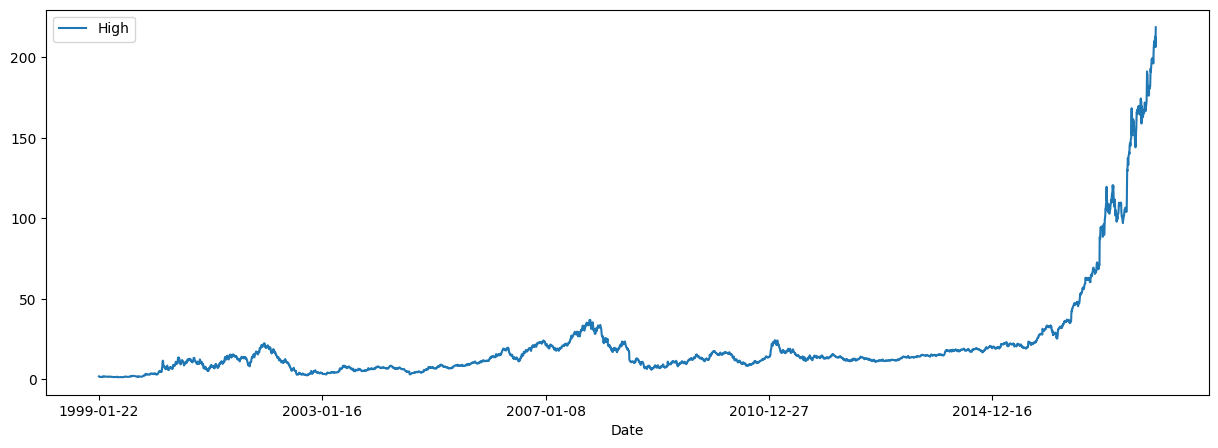

In [ ]:
plot = df.plot('Date', 'High', figsize=(15, 5))

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4733 entries, 0 to 4732
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     4733 non-null   object 
 1   Open     4733 non-null   float64
 2   High     4733 non-null   float64
 3   Low      4733 non-null   float64
 4   Close    4733 non-null   float64
 5   Volume   4733 non-null   int64  
 6   OpenInt  4733 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 259.0+ KB


In [ ]:
# checking for null values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
OpenInt,0


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(4733, 7)

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,4733.000000,4733.000000,4733.000000,4733.000000,4.733000e+03,4733.0
mean,20.796242,21.157332,20.420417,20.805404,1.615287e+07,0.0
std,30.236284,30.615622,29.792958,30.263705,1.272446e+07,0.0
min,1.298900,1.317500,1.233900,1.261900,0.000000e+00,0.0
25%,7.988300,8.247900,7.756400,7.978900,8.181100e+06,0.0
50%,12.963000,13.238000,12.721000,12.990000,1.390271e+07,0.0
75%,19.141000,19.418000,18.778000,19.106000,2.051602e+07,0.0
max,213.080000,218.670000,211.630000,216.140000,2.496659e+08,0.0


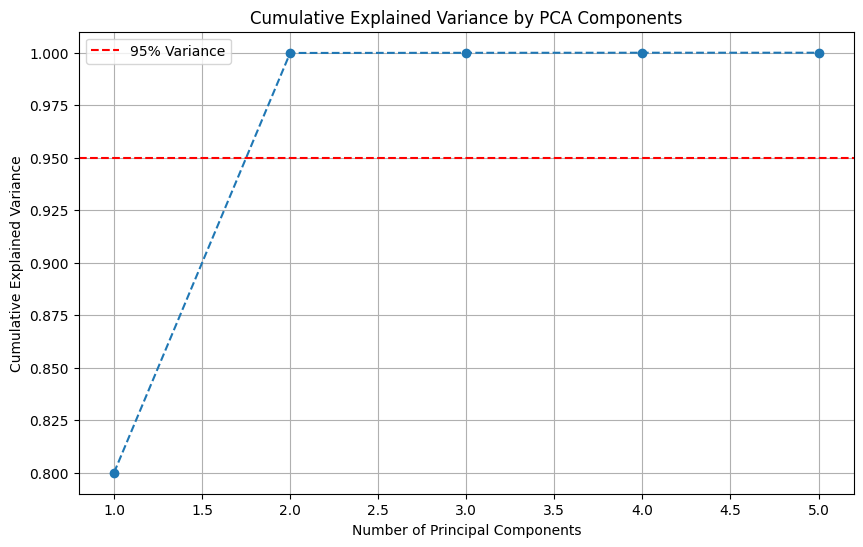


🔍 PCA Component Loadings:
          PC1    PC2    PC3    PC4    PC5
Open    0.500  0.003  0.705  0.164 -0.476
High    0.500  0.006  0.162 -0.659  0.538
Low     0.500 -0.001 -0.208  0.703  0.460
Close   0.500  0.003 -0.659 -0.208 -0.522
Volume -0.005  1.000 -0.002  0.005 -0.000


In [ ]:
# PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_features = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(pca_features)

pca = PCA()
principal_components = pca.fit_transform(scaled_features)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

loading_df = pd.DataFrame(
    pca.components_.T,
    index=pca_features.columns,
    columns=[f'PC{i+1}' for i in range(len(pca_features.columns))]
)
print("\n🔍 PCA Component Loadings:")
print(loading_df.round(3))

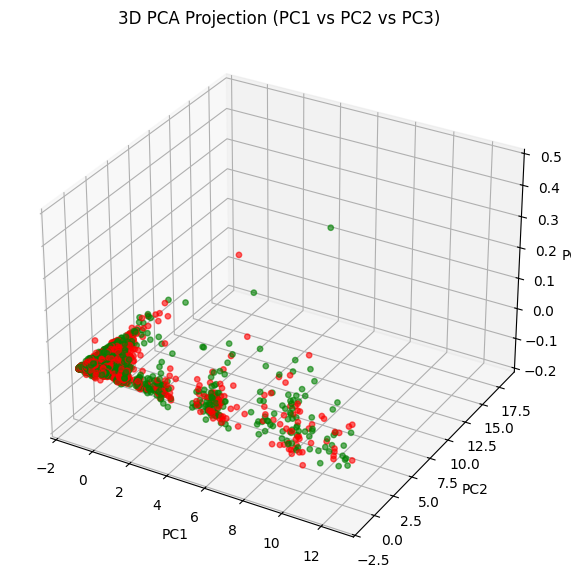

In [ ]:
# ===== PCA 3D Projection Section =====
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca_features = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(pca_features)

pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_features)

# Reset index of both Series to ensure alignment
labels = df['Close'].shift(-1).dropna().reset_index(drop=True)
close_values = df['Close'].dropna().reset_index(drop=True)

# Use the same length for both Series
comparison_length = min(len(labels), len(close_values), len(pca_result))

labels = labels[:comparison_length] > close_values[:comparison_length]
color_map = ['green' if label else 'red' for label in labels]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    pca_result[:comparison_length, 0],  # Use the same length for pca_result
    pca_result[:comparison_length, 1],
    pca_result[:comparison_length, 2],
    c=color_map,
    alpha=0.6,
    s=15
)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Projection (PC1 vs PC2 vs PC3)')
plt.show()

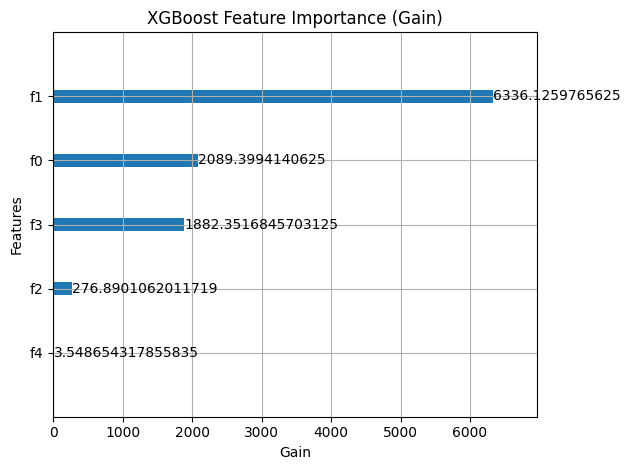

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# 特徵與標籤同上
features = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()
labels = df['Close'].shift(-1).dropna()
features = features.iloc[:-1]

scaler = StandardScaler()
X = scaler.fit_transform(features)
y = labels.values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立 XGBoost 模型
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# 視覺化特徵重要性（可選不同方式）
xgb.plot_importance(xgb_model, importance_type='gain', title='XGBoost Feature Importance (Gain)', xlabel='Gain')
plt.tight_layout()
plt.show()

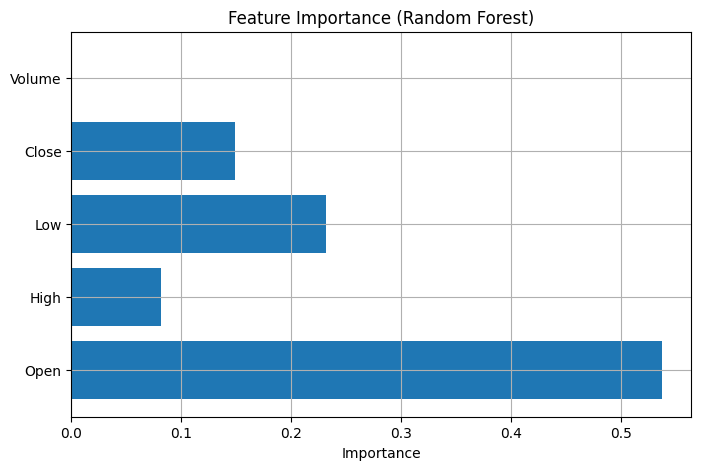

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# 原始特徵與標籤
features = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()
labels = df['Close'].shift(-1).dropna()
features = features.iloc[:-1]  # 配合 shift 後的 y

# 標準化
scaler = StandardScaler()
X = scaler.fit_transform(features)
y = labels.values

# 切分資料
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立模型並訓練
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 取得特徵重要性
importances = rf.feature_importances_
feature_names = features.columns

# 視覺化
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.grid(True)
plt.show()


#### Converting the DataFrame to a NumPy Array

In [ ]:
def create_sequences(input_data, output_data, window_size, step):
    sequences = []
    labels = []
    for i in range(0, len(input_data) - window_size, step):
        sequences.append(input_data[i:(i + window_size)])
        labels.append(output_data[i + window_size])
    return np.array(sequences), np.array(labels)

In [ ]:

import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Select features
features = df[['Open', 'High', 'Low', 'Close']]
labels = df['High'].shift(-1)  # Next day's high price as label

X, y = create_sequences(features, labels, window_size=30, step=5)

print(f'Shape of data X: {X.shape}')
print(f'Shape of data y: {y.shape}')

# split the hold-out tests
ind = np.linspace(0, len(X)-1, num=int(len(X)*0.1), dtype=int) # 10% hold-out
x_test = X[ind]
y_test = y[ind]
all_ind = np.arange(len(X))
remains_ind = np.delete(all_ind, ind)

X = X[remains_ind]
y = y[remains_ind]

# shuffle dataset
ind = np.random.permutation(len(X))
X = X[ind]
y = y[ind]
split_point = int(X.shape[0]*0.8)

x_train = X[:split_point]
y_train = y[:split_point]
x_val = X[split_point:]
y_val = y[split_point:]

print(f'Shape of data x_train: {x_train.shape}')
print(f'Shape of data y_train: {y_train.shape}')
print(f'Shape of data x_val: {x_val.shape}')
print(f'Shape of data y_val: {y_val.shape}')
print(f'Shape of data x_test: {x_test.shape}')
print(f'Shape of data y_test: {y_test.shape}')

# Convert to PyTorch tensors
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).float()

x_val = torch.from_numpy(x_val).float()
y_val = torch.from_numpy(y_val).float()

x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).float()

batch_size = 32

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)
test_dataset = TensorDataset(x_test, y_test)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f'Number of samples in training and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')


Shape of data X: (941, 30, 4)
Shape of data y: (941,)
Shape of data x_train: (677, 30, 4)
Shape of data y_train: (677,)
Shape of data x_val: (170, 30, 4)
Shape of data y_val: (170,)
Shape of data x_test: (94, 30, 4)
Shape of data y_test: (94,)
Number of samples in training and validation are 677 and 170.


In [ ]:
'''
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Select features
raw_features = df[['Open', 'High', 'Low', 'Close']]
labels = df['High'].shift(-1)  # Next day's high price as label

# Normalize features (Z-score)
feature_means = raw_features.mean()
feature_stds = raw_features.std()
features = (raw_features - feature_means) / feature_stds

# Remove the last label (NaN)
features = features.iloc[:-1].values
labels = labels.dropna().values

# 建立序列資料
X, y = create_sequences(features, labels, window_size=30, step=5)

print(f'Shape of data X: {X.shape}')
print(f'Shape of data y: {y.shape}')

# split the hold-out tests
ind = np.linspace(0, len(X)-1, num=int(len(X)*0.1), dtype=int)
x_test = X[ind]
y_test = y[ind]
all_ind = np.arange(len(X))
remains_ind = np.delete(all_ind, ind)

X = X[remains_ind]
y = y[remains_ind]

# shuffle dataset
ind = np.random.permutation(len(X))
X = X[ind]
y = y[ind]
split_point = int(X.shape[0]*0.8)

x_train = X[:split_point]
y_train = y[:split_point]
x_val = X[split_point:]
y_val = y[split_point:]

print(f'Shape of data x_train: {x_train.shape}')
print(f'Shape of data y_train: {y_train.shape}')
print(f'Shape of data x_val: {x_val.shape}')
print(f'Shape of data y_val: {y_val.shape}')
print(f'Shape of data x_test: {x_test.shape}')
print(f'Shape of data y_test: {y_test.shape}')

# Convert to PyTorch tensors
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).float()
x_val = torch.from_numpy(x_val).float()
y_val = torch.from_numpy(y_val).float()
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).float()

batch_size = 32

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)
test_dataset = TensorDataset(x_test, y_test)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f'Number of samples in training and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')
'''

"\nimport numpy as np\nimport torch\nfrom torch.utils.data import DataLoader, TensorDataset\nimport matplotlib.pyplot as plt\n\n# Select features\nraw_features = df[['Open', 'High', 'Low', 'Close']]\nlabels = df['High'].shift(-1)  # Next day's high price as label\n\n# Normalize features (Z-score)\nfeature_means = raw_features.mean()\nfeature_stds = raw_features.std()\nfeatures = (raw_features - feature_means) / feature_stds\n\n# Remove the last label (NaN)\nfeatures = features.iloc[:-1].values\nlabels = labels.dropna().values\n\n# 建立序列資料\nX, y = create_sequences(features, labels, window_size=30, step=5)\n\nprint(f'Shape of data X: {X.shape}')\nprint(f'Shape of data y: {y.shape}')\n\n# split the hold-out tests\nind = np.linspace(0, len(X)-1, num=int(len(X)*0.1), dtype=int)\nx_test = X[ind]\ny_test = y[ind]\nall_ind = np.arange(len(X))\nremains_ind = np.delete(all_ind, ind)\n\nX = X[remains_ind]\ny = y[remains_ind]\n\n# shuffle dataset\nind = np.random.permutation(len(X))\nX = X[ind]\ny 

## B. Defining Neural Networks

In [ ]:
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

## C. Training the Neural Network

In [ ]:
# Check your GPU status.
!nvidia-smi

Sat Apr 26 17:07:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   76C    P0             33W /   70W |     102MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm.auto import tqdm

train_losses = []
val_losses = []

epochs = 100

model = LSTMModel(input_dim=4, hidden_dim=500, num_layers=2, output_dim=1).cuda()
print(model)

best_val_loss = float('inf')

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0)

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0

    for features, labels in train_loader:
        features = features.cuda()
        labels = labels.cuda()
        outputs = model(features).squeeze(-1)
        loss = criterion(outputs, labels)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Learning rate update
    lr_scheduler.step()

    avg_train_loss = total_loss / len(train_loader)

    # Validation
    model.eval()
    total_val_loss = 0.0

    with torch.no_grad():
        for features, labels in val_loader:
            features = features.cuda()
            labels = labels.cuda()
            outputs = model(features).squeeze(-1)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(val_loader)

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'best_model.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Val loss: {avg_val_loss:.4f}, Best Val loss: {best_val_loss:.4f}')

    # Store performance
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

LSTMModel(
  (lstm): LSTM(4, 500, num_layers=2, batch_first=True)
  (fc): Linear(in_features=500, out_features=1, bias=True)
)


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 879.9171, Val loss: 1871.0664, Best Val loss: 1871.0664
Epoch 2/100, Train loss: 830.1858, Val loss: 1825.1382, Best Val loss: 1825.1382
Epoch 3/100, Train loss: 838.3624, Val loss: 1817.0972, Best Val loss: 1817.0972
Epoch 4/100, Train loss: 922.2450, Val loss: 1815.1689, Best Val loss: 1815.1689
Epoch 5/100, Train loss: 761.8529, Val loss: 1774.8709, Best Val loss: 1774.8709
Epoch 6/100, Train loss: 738.7891, Val loss: 1738.6473, Best Val loss: 1738.6473
Epoch 7/100, Train loss: 708.2851, Val loss: 1676.0353, Best Val loss: 1676.0353
Epoch 8/100, Train loss: 640.4482, Val loss: 1518.1033, Best Val loss: 1518.1033
Epoch 9/100, Train loss: 533.2314, Val loss: 1296.1491, Best Val loss: 1296.1491
Epoch 10/100, Train loss: 445.4736, Val loss: 1114.1486, Best Val loss: 1114.1486
Epoch 11/100, Train loss: 375.1270, Val loss: 956.2628, Best Val loss: 956.2628
Epoch 12/100, Train loss: 319.5400, Val loss: 835.2359, Best Val loss: 835.2359
Epoch 13/100, Train loss: 276

#### Visualizing the model performance

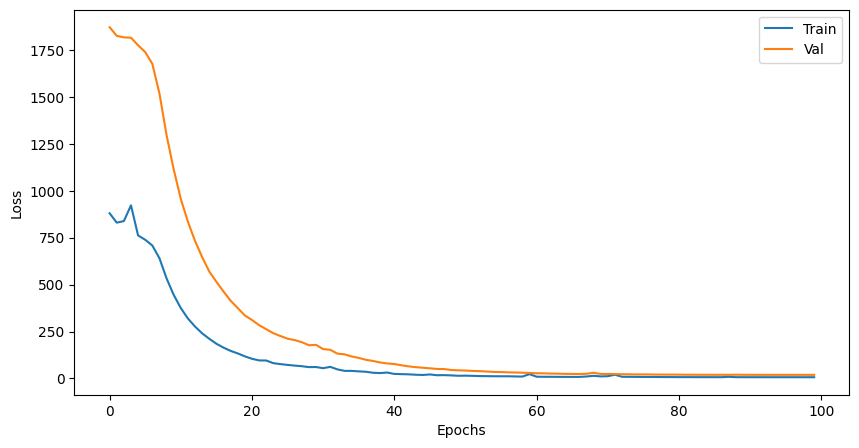

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses)
plt.plot(val_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])

plt.show()

## D. Evaluating Your Trained Model

In [ ]:
import torch.nn as nn
import matplotlib.pyplot as plt

# Load the trained weights
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

criterion = nn.MSELoss()

pred_value = []
actual_value = []

# 計算 MSE
test_loss = 0.0
with torch.no_grad():
    for features, labels in test_loader:
        features = features.cuda()
        labels = labels.cuda()
        outputs = model(features).squeeze(-1)

        # 收集預測與真實值
        pred_value.append(outputs.cpu())
        actual_value.append(labels.cpu())

        # 累計 MSE
        loss = criterion(outputs, labels)
        test_loss += loss.item()

# 計算平均 MSE
avg_test_loss = test_loss / len(test_loader)
print(f'\n✅ Final Test MSE: {avg_test_loss:.4f}')

# 合併所有批次的預測與真實值
pred_value = torch.cat(pred_value)
actual_value = torch.cat(actual_value)


✅ Final Test MSE: 22.1860


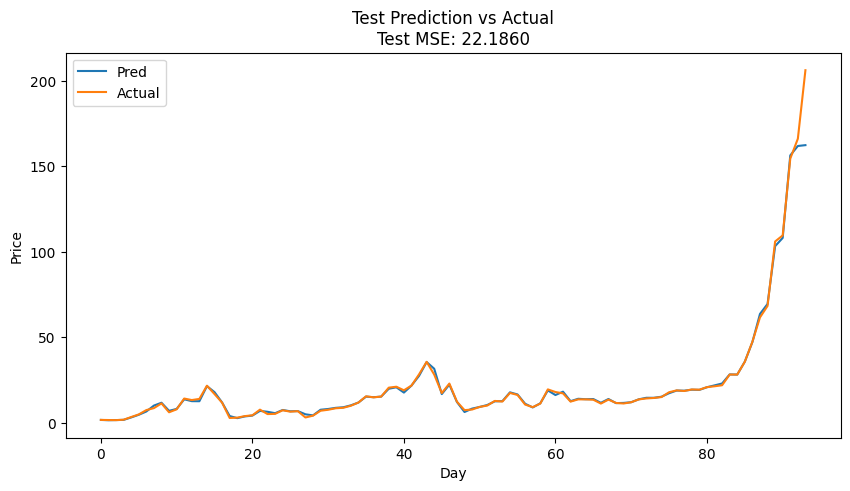

In [ ]:
# 繪圖
plt.figure(figsize=(10, 5))
plt.plot(pred_value[:], label='Pred')
plt.plot(actual_value[:], label='Actual')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title(f'Test Prediction vs Actual\nTest MSE: {avg_test_loss:.4f}')
plt.show()